Fourier N=128 y=top_hat
-------------

Jim Mahoney | Jan 2018

In [2]:
# python 2
import numpy as np
from numpy import pi, exp, linspace, zeros, array, conjugate, sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
N = 128                  # number of points
x = array(range(N))    # x axis index : 0 .. N-1

In [4]:
# The complex exponential basis 

def k_basis(k):
    """ Return one of the complex exp basis functions"""
    return exp(-1j * x * k * 2*pi/N ) / sqrt(N)

def subplot_basis(k):
    """ Plot one of the basis functions """
    plt.subplot(410 + k + 1)
    plt.axis([-0.5, N-0.5, -0.9, 0.9])
    plt.title("k={}".format(k), fontsize=9)
    plt.plot(x, k_basis(k).real, 'ro', x, k_basis(k).real, 'r')
    plt.plot(x, k_basis(k).imag, 'go', x, k_basis(k).imag, 'g')

def plot_basis():
    plt.figure(dpi=200, figsize=(8, 6)) # (x inches, y inches)
    for k in range(N):
        subplot_basis(k)
    plt.tight_layout()
    plt.show()

#plot_basis()

In [5]:
# Show that the basis vectors are orthonal.

def dot(x, y):
    """ Inner product including complex conjugation, normalized by 1/N , rounded"""
    result = np.dot(x, np.conjugate(y))
    return np.round(result, 10)

def k_basis_dots():
    """ Return matrix of dot products of k basis"""
    dot_products = zeros([N,N], dtype=np.complex_)
    for k1 in range(N):
        for k2 in range(N):
            dot_products[k1, k2] = dot(k_basis(k1), k_basis(k2))
    return dot_products

#print k_basis_dots()

In [8]:
y = zeros((N,))
y[0:6] = 1.0
y[-5:] = 1.0

In [9]:
y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.])

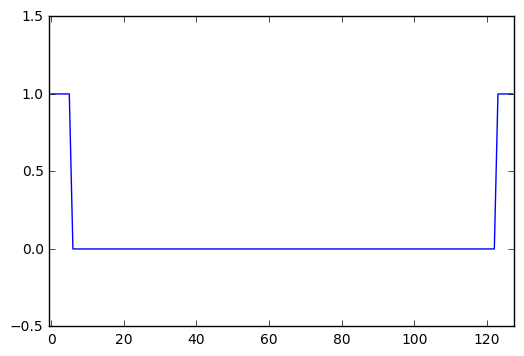

In [15]:
plt.axis([-0.5, N-0.5, -0.5, 1.5])

plt.plot(x,y)
plt.show()

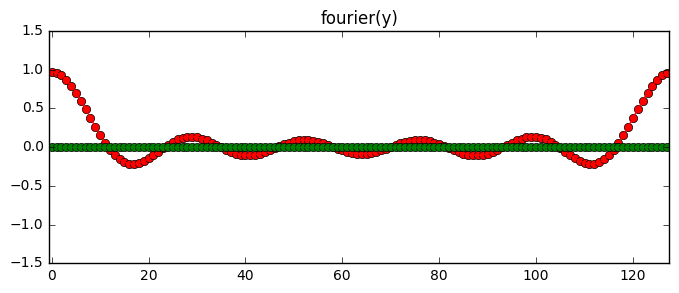

In [16]:

def fourier(y):
    """ Return (complex) coefficients of fourier transform"""
    return array([dot(y, k_basis(k)) for k in range(N)])

C = fourier(y)
C_power = sqrt(C * conjugate(C))

plt.figure(dpi=200, figsize=(8, 3)) # (x inches, y inches)
plt.axis([-0.5, N-0.5, -1.5, 1.5])
plt.title("fourier(y)")
plt.plot(x, C.real, 'ro', x, C.real, 'r')
plt.plot(x, C.imag, 'go', x, C.imag, 'g')
#plt.plot(x, C_power, 'bo', x, C_power, 'b')
plt.show()


In [ ]:
# check to see that it worked 

